In [1]:
print('pp')

pp


In [82]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
# 한글깨짐 방지
import matplotlib.font_manager as fm
font_path = r'C:\\Users\\hansung\\Desktop\\data\\NanumGothic-Regular.ttf'
fontprop = fm.FontProperties(fname=font_path)
%matplotlib inline

In [84]:
# figsize 를 전역으로 설정
plt.rcParams['figure.figsize'] = (15, 10)

1. 데이터 컬럼명 변경 

In [3]:
order_data = pd.read_csv('C:\\Users\\hansung\\Desktop\\data\\주문데이터.csv', encoding='utf-8-sig')

In [4]:
order_data.columns = ['주문일','주문정보 키','주문타입(1:주문, 2:반품)','주문번호','고객사 키','고객사 이름','상품 수량', '상품 정보']

In [5]:
order_data.head()

,주문일,주문정보 키,"주문타입(1:주문, 2:반품)",주문번호,고객사 키,고객사 이름,상품 수량,상품 정보
0,2021-09-30,6618799,1,20210930-00100001,1,참살이반찬,1,NaN
1,2021-09-30,6618800,1,20210930-00100002,1,참살이반찬,1,NaN
2,2021-09-30,6618801,1,20210930-00100003,1,참살이반찬,1,NaN
3,2021-09-30,6618802,1,20210930-00100004,1,참살이반찬,1,NaN
4,2021-09-30,6618803,1,20210930-00100005,1,참살이반찬,1,NaN


In [6]:
order_data.isnull().sum()

주문일                     0
주문정보 키                  0
주문타입(1:주문, 2:반품)        0
주문번호                    0
고객사 키                   0
고객사 이름                  0
상품 수량                   0
상품 정보               18740
dtype: int64

In [7]:
ship_data = pd.read_csv('C:\\Users\\hansung\\Desktop\\data\\배송데이터.csv', encoding='utf-8-sig')

In [8]:
ship_data.columns = ['배송일', '배송정보 키','주문정보 키','배송 회차', '권역','배송 순서', '배송 시작 시간', '배송 완료 시간']

In [9]:
ship_data.head()

,배송일,배송정보 키,주문정보 키,배송 회차,권역,배송 순서,배송 시작 시간,배송 완료 시간
0,2021-09-30,9481540,6619590,1,10A01,2,2021-10-01 2:44,2021-10-01 2:49
1,2021-09-30,9481769,6619819,1,10A01,7,2021-10-01 2:44,2021-10-01 3:10
2,2021-09-30,9482076,6616088,1,10A01,13,2021-10-01 2:44,2021-10-01 3:29
3,2021-09-30,9482423,6616438,1,10A01,25,2021-10-01 2:44,2021-10-01 4:17
4,2021-09-30,9482999,6623707,1,10A01,39,2021-10-01 2:44,2021-10-01 4:56


In [10]:
ship_data.isnull().sum()

배송일          0
배송정보 키       0
주문정보 키       0
배송 회차        0
권역           0
배송 순서        0
배송 시작 시간    20
배송 완료 시간     0
dtype: int64

In [11]:
ship_data = ship_data.dropna(axis=0)

1-1. 배송데이터에서 2021년 10월 1일 ~ 2021년 10월 7일의 권역별 시작시간, 완료시간, 총 소요시간, 평균 소요시간이 포함된 데이터프레임

In [ ]:
# 날짜 설정 -> groupby(권역별)[완료시간, 총소요시간(배송완료-배송시작),평균 소요시간(총 소요시간/회차)]

In [12]:
import re
num = re.compile("[^0-9]")
ship_data['조'] = [num.findall(string)[0] for string in ship_data['권역']]

In [13]:
ship_data.head()

,배송일,배송정보 키,주문정보 키,배송 회차,권역,배송 순서,배송 시작 시간,배송 완료 시간,조
0,2021-09-30,9481540,6619590,1,10A01,2,2021-10-01 2:44,2021-10-01 2:49,A
1,2021-09-30,9481769,6619819,1,10A01,7,2021-10-01 2:44,2021-10-01 3:10,A
2,2021-09-30,9482076,6616088,1,10A01,13,2021-10-01 2:44,2021-10-01 3:29,A
3,2021-09-30,9482423,6616438,1,10A01,25,2021-10-01 2:44,2021-10-01 4:17,A
4,2021-09-30,9482999,6623707,1,10A01,39,2021-10-01 2:44,2021-10-01 4:56,A


In [14]:
ship_data['배송 시작 시간'] = ship_data['배송 시작 시간'] + ':00'

In [15]:
ship_data['배송 완료 시간'] = ship_data['배송 완료 시간'] + ':00'

In [16]:
query_data = ship_data.query('"2021-10-01"<= 배송일 <= "2021-10-07"')

In [26]:
query_data

,배송일,배송정보 키,주문정보 키,배송 회차,권역,배송 순서,배송 시작 시간,배송 완료 시간,조
20389,2021-10-01,9514484,6634091,1,10A01,19,2021-10-02 2:28:00,2021-10-02 4:14:00,A
20390,2021-10-01,9515000,6634608,1,10A01,14,2021-10-02 2:28:00,2021-10-02 3:55:00,A
20391,2021-10-01,9515001,6634609,1,10A01,15,2021-10-02 2:28:00,2021-10-02 3:56:00,A
20392,2021-10-01,9515065,6634673,1,10A01,20,2021-10-02 2:28:00,2021-10-02 4:18:00,A
20393,2021-10-01,9515432,6635040,1,10A01,26,2021-10-02 2:28:00,2021-10-02 4:45:00,A
...,...,...,...,...,...,...,...,...,...
132001,2021-10-07,9671465,6751578,1,22G06,13,2021-10-08 4:44:00,2021-10-08 5:14:00,G
132002,2021-10-07,9671933,6734552,1,22G06,40,2021-10-08 4:44:00,2021-10-08 7:05:00,G
132003,2021-10-07,9672088,6740716,1,22G06,6,2021-10-08 4:44:00,2021-10-08 4:44:00,G
132004,2021-10-07,9672490,6737703,1,22G06,23,2021-10-08 4:44:00,2021-10-08 5:53:00,G


In [17]:
result_data = query_data.groupby(['배송일','권역']).agg({'배송 시작 시간': 'min', '배송 완료 시간': 'max'}).reset_index()

In [18]:
result_data

,배송일,권역,배송 시작 시간,배송 완료 시간
0,2021-10-01,10A01,2021-10-02 2:28:00,2021-10-02 4:45:00
1,2021-10-01,10A02,2021-10-02 2:50:00,2021-10-02 5:25:00
2,2021-10-01,10A03,2021-10-02 1:58:00,2021-10-02 5:54:00
3,2021-10-01,10A04,2021-10-02 2:46:00,2021-10-02 5:30:00
4,2021-10-01,10A05,2021-10-02 2:39:00,2021-10-02 4:52:00
...,...,...,...,...
2423,2021-10-07,19G06,2021-10-08 2:29:00,2021-10-08 4:48:00
2424,2021-10-07,22G01,2021-10-08 3:41:00,2021-10-08 6:22:00
2425,2021-10-07,22G02,2021-10-08 2:25:00,2021-10-08 5:52:00
2426,2021-10-07,22G05,2021-10-08 2:44:00,2021-10-08 5:50:00


In [19]:
time_diff = list()
for _, (start, end) in result_data[['배송 시작 시간','배송 완료 시간']].iterrows():
    # print(start)
    start_time = datetime.strptime(start,'%Y-%m-%d %H:%M:%S')
    # start_time = datetime.strftime(start,'%Y-%m-%d %H:%M:%S')
    end_time = datetime.strptime(end,'%Y-%m-%d %H:%M:%S')
    diff = end_time - start_time # 배송 걸린 시간
    # print(type(diff))
    # print(time_diff)
    time_diff.append(diff)


In [32]:
result_data['총 소요시간'] = time_diff

In [21]:
result_data

,배송일,권역,배송 시작 시간,배송 완료 시간,총 소요시간
0,2021-10-01,10A01,2021-10-02 2:28:00,2021-10-02 4:45:00,0 days 02:17:00
1,2021-10-01,10A02,2021-10-02 2:50:00,2021-10-02 5:25:00,0 days 02:35:00
2,2021-10-01,10A03,2021-10-02 1:58:00,2021-10-02 5:54:00,0 days 03:56:00
3,2021-10-01,10A04,2021-10-02 2:46:00,2021-10-02 5:30:00,0 days 02:44:00
4,2021-10-01,10A05,2021-10-02 2:39:00,2021-10-02 4:52:00,0 days 02:13:00
...,...,...,...,...,...
2423,2021-10-07,19G06,2021-10-08 2:29:00,2021-10-08 4:48:00,0 days 02:19:00
2424,2021-10-07,22G01,2021-10-08 3:41:00,2021-10-08 6:22:00,0 days 02:41:00
2425,2021-10-07,22G02,2021-10-08 2:25:00,2021-10-08 5:52:00,0 days 03:27:00
2426,2021-10-07,22G05,2021-10-08 2:44:00,2021-10-08 5:50:00,0 days 03:06:00


In [22]:
result_data.groupby(['배송일','권역','배송 시작 시간','배송 완료 시간'])['총 소요시간'].mean().reset_index()

,배송일,권역,배송 시작 시간,배송 완료 시간,총 소요시간
0,2021-10-01,10A01,2021-10-02 2:28:00,2021-10-02 4:45:00,0 days 02:17:00
1,2021-10-01,10A02,2021-10-02 2:50:00,2021-10-02 5:25:00,0 days 02:35:00
2,2021-10-01,10A03,2021-10-02 1:58:00,2021-10-02 5:54:00,0 days 03:56:00
3,2021-10-01,10A04,2021-10-02 2:46:00,2021-10-02 5:30:00,0 days 02:44:00
4,2021-10-01,10A05,2021-10-02 2:39:00,2021-10-02 4:52:00,0 days 02:13:00
...,...,...,...,...,...
2423,2021-10-07,19G06,2021-10-08 2:29:00,2021-10-08 4:48:00,0 days 02:19:00
2424,2021-10-07,22G01,2021-10-08 3:41:00,2021-10-08 6:22:00,0 days 02:41:00
2425,2021-10-07,22G02,2021-10-08 2:25:00,2021-10-08 5:52:00,0 days 03:27:00
2426,2021-10-07,22G05,2021-10-08 2:44:00,2021-10-08 5:50:00,0 days 03:06:00


In [23]:
result_data.head(10)

,배송일,권역,배송 시작 시간,배송 완료 시간,총 소요시간
0,2021-10-01,10A01,2021-10-02 2:28:00,2021-10-02 4:45:00,0 days 02:17:00
1,2021-10-01,10A02,2021-10-02 2:50:00,2021-10-02 5:25:00,0 days 02:35:00
2,2021-10-01,10A03,2021-10-02 1:58:00,2021-10-02 5:54:00,0 days 03:56:00
3,2021-10-01,10A04,2021-10-02 2:46:00,2021-10-02 5:30:00,0 days 02:44:00
4,2021-10-01,10A05,2021-10-02 2:39:00,2021-10-02 4:52:00,0 days 02:13:00
5,2021-10-01,10A06,2021-10-02 1:46:00,2021-10-02 5:05:00,0 days 03:19:00
6,2021-10-01,10A07,2021-10-02 1:44:00,2021-10-02 4:28:00,0 days 02:44:00
7,2021-10-01,10A08,2021-10-02 2:46:00,2021-10-02 4:53:00,0 days 02:07:00
8,2021-10-01,10A09,2021-10-02 2:41:00,2021-10-02 5:29:00,0 days 02:48:00
9,2021-10-01,10A10,2021-10-02 3:16:00,2021-10-02 6:17:00,0 days 03:01:00


In [33]:
# 배송일, 권역별 배송 건수 : count 를 하여 평균 소요시간 구하고자 진행. 
query_cnt = query_data[['배송일','권역','조']].groupby(['배송일','권역']).count().reset_index()

In [34]:
query_cnt

,배송일,권역,조
0,2021-10-01,10A01,26
1,2021-10-01,10A02,44
2,2021-10-01,10A03,43
3,2021-10-01,10A04,46
4,2021-10-01,10A05,40
...,...,...,...
2423,2021-10-07,19G06,48
2424,2021-10-07,22G01,49
2425,2021-10-07,22G02,45
2426,2021-10-07,22G05,50


In [35]:
# result_data : 총 소요시간의 정보, query_cnt : 배송 건수의 정보를 가지고 평균 소요시간 구하고자, 데이터를 합침.
result_1_1 = pd.merge(query_cnt, result_data, on = ['배송일','권역'], how='right')

In [36]:
result_1_1

,배송일,권역,조,배송 시작 시간,배송 완료 시간,총 소요시간
0,2021-10-01,10A01,26,2021-10-02 2:28:00,2021-10-02 4:45:00,0 days 02:17:00
1,2021-10-01,10A02,44,2021-10-02 2:50:00,2021-10-02 5:25:00,0 days 02:35:00
2,2021-10-01,10A03,43,2021-10-02 1:58:00,2021-10-02 5:54:00,0 days 03:56:00
3,2021-10-01,10A04,46,2021-10-02 2:46:00,2021-10-02 5:30:00,0 days 02:44:00
4,2021-10-01,10A05,40,2021-10-02 2:39:00,2021-10-02 4:52:00,0 days 02:13:00
...,...,...,...,...,...,...
2423,2021-10-07,19G06,48,2021-10-08 2:29:00,2021-10-08 4:48:00,0 days 02:19:00
2424,2021-10-07,22G01,49,2021-10-08 3:41:00,2021-10-08 6:22:00,0 days 02:41:00
2425,2021-10-07,22G02,45,2021-10-08 2:25:00,2021-10-08 5:52:00,0 days 03:27:00
2426,2021-10-07,22G05,50,2021-10-08 2:44:00,2021-10-08 5:50:00,0 days 03:06:00


In [37]:
result_1_1['평균소요시간'] = result_1_1['총 소요시간']/result_1_1['조']

In [38]:
result_1_1 = result_1_1[['배송일','권역','배송 시작 시간','배송 완료 시간','총 소요시간','평균소요시간']]

In [39]:
result_1_1.head()

,배송일,권역,배송 시작 시간,배송 완료 시간,총 소요시간,평균소요시간
0,2021-10-01,10A01,2021-10-02 2:28:00,2021-10-02 4:45:00,0 days 02:17:00,0 days 00:05:16.153846153
1,2021-10-01,10A02,2021-10-02 2:50:00,2021-10-02 5:25:00,0 days 02:35:00,0 days 00:03:31.363636363
2,2021-10-01,10A03,2021-10-02 1:58:00,2021-10-02 5:54:00,0 days 03:56:00,0 days 00:05:29.302325581
3,2021-10-01,10A04,2021-10-02 2:46:00,2021-10-02 5:30:00,0 days 02:44:00,0 days 00:03:33.913043478
4,2021-10-01,10A05,2021-10-02 2:39:00,2021-10-02 4:52:00,0 days 02:13:00,0 days 00:03:19.500000


1-2.	배송일 기준으로 2021년 10월 1일 ~ 2021년 10월 7일 동안의 배송 건에서 날짜, 조, 고객사, 주문 타입 별 상품 수량의 합을 나타내는 데이터프레임

In [ ]:
# 고객 데이터와 배송 데이터 머지 : 주문 정보 키 기준으로 합치기
# 날짜 설정 -> groupby(배송건)[완료시간, 총소요시간(배송완료-배송시작),평균 소요시간(총 소요시간/회차)]
# 날짜 설정 -> groupby([날짜, 권역(조), 주문타입, 고객사 키/이름])[상품 수량 합]
# 이때, 주문 타입 (A,B 등등) : 권역에서 숫자를 제외한 문자만 추출하여 새로운 변수 만들기


In [40]:
#1-2-1. 배송, 주문 데이터 합치기
order_ship_data = pd.merge(order_data, ship_data, on= '주문정보 키', how='right')

In [41]:
order_ship_data.head()

,주문일,주문정보 키,"주문타입(1:주문, 2:반품)",주문번호,고객사 키,고객사 이름,상품 수량,상품 정보,배송일,배송정보 키,배송 회차,권역,배송 순서,배송 시작 시간,배송 완료 시간,조
0,2021-09-30,6619590,1,20210930-00700462,3,슬림쿡,1,4. 간헐A프로그램 / 수제2개,2021-09-30,9481540,1,10A01,2,2021-10-01 2:44:00,2021-10-01 2:49:00,A
1,2021-09-30,6619819,1,20210930-00700691,3,슬림쿡,1,8-1. 간헐C프로그램,2021-09-30,9481769,1,10A01,7,2021-10-01 2:44:00,2021-10-01 3:10:00,A
2,2021-09-30,6616088,1,20210930-01100072,14,프레시코드,1,일회용품(포크+물티슈) - 3개\n치킨타코(M) - 1개\n도시락(단호박) - 1개...,2021-09-30,9482076,1,10A01,13,2021-10-01 2:44:00,2021-10-01 3:29:00,A
3,2021-09-30,6616438,1,20210930-01100420,14,프레시코드,1,닭가슴살(M) - 2개\n자 몽(M) - 1개,2021-09-30,9482423,1,10A01,25,2021-10-01 2:44:00,2021-10-01 4:17:00,A
4,2021-09-30,6623707,1,20210930-01100996,14,프레시코드,1,닭가슴살(M) - 1개\n마카로니(M) - 1개\n치킨타코(M) - 1개\nT. O...,2021-09-30,9482999,1,10A01,39,2021-10-01 2:44:00,2021-10-01 4:56:00,A


In [42]:
order_ship_data.isnull().sum()

주문일                     0
주문정보 키                  0
주문타입(1:주문, 2:반품)        0
주문번호                    0
고객사 키                   0
고객사 이름                  0
상품 수량                   0
상품 정보               16869
배송일                     0
배송정보 키                  0
배송 회차                   0
권역                      0
배송 순서                   0
배송 시작 시간                0
배송 완료 시간                0
조                       0
dtype: int64

In [43]:
order_ship_data.keys()

Index(['주문일', '주문정보 키', '주문타입(1:주문, 2:반품)', '주문번호', '고객사 키', '고객사 이름', '상품 수량',
       '상품 정보', '배송일', '배송정보 키', '배송 회차', '권역', '배송 순서', '배송 시작 시간',
       '배송 완료 시간', '조'],
      dtype='object')

In [44]:
order_ship_data = order_ship_data.query('"2021-10-01"<= 배송일 <= "2021-10-07"')

In [45]:
result_1_2 = order_ship_data.groupby(['주문일','조','고객사 이름','주문타입(1:주문, 2:반품)'])['상품 수량'].count().reset_index()

In [46]:
result_1_2.head()

,주문일,조,고객사 이름,"주문타입(1:주문, 2:반품)",상품 수량
0,2021-10-01,A,(주) 현대그린푸드,1,47
1,2021-10-01,A,(주)바이오일레븐,1,41
2,2021-10-01,A,건화,1,13
3,2021-10-01,A,꾸까,1,19
4,2021-10-01,A,다노샵(상온),1,22


2.	주어진 데이터를 시각화하고 분석 결과를 서술. voc_raw 데이터

In [ ]:
# 지역별 배송 수량 건수 (주문/반품) 
# 조별 배송 횟수(COUNT) : 햇음
# 조 별로 배송 실수(오배송) COUNT : 햇음
# 주문 VOC 소분류 COUNT => 무슨 실수가 많은지 확인. 
# 배송 날짜 와 VOC 등록일  로 보려했는데 안나옴. 

In [ ]:
# 한글 꺠짐 방지
from matplotlib import font_manager
from matplotlib import rc
font_name = font_manager.FontProperties(fname='C:\\Users\\hansung\\Desktop\\data\\NanumGothic-Regular.ttf').get_name()
rc('font', family=font_name)

In [51]:
raw_data = pd.read_csv('C:\\Users\\hansung\\Desktop\\data\\voc_raw.csv', encoding='utf-8-sig')

In [62]:
raw_data.columns = ['주문 타입','배송일','VOC 상세','고객사 키','상품 정보','권역','주문정보 키','VOC 등록일','VOC 소분류', 'VOC 중분류','VOC 대분류','VOC 책임','배송지 X좌표','배송지 Y좌표','배송지 법정동명','배송지 행정동명']

In [63]:
# 권역 변수의 값들에서 배송 "조" 추출하기
import re
num = re.compile("[^0-9]")
raw_data['조'] = [num.findall(string)[0] for string in raw_data['권역']]

In [64]:
raw_data.isnull().sum()

주문 타입         0
배송일           0
VOC 상세      957
고객사 키         0
상품 정보       182
권역            0
주문정보 키        0
VOC 등록일       0
VOC 소분류       0
VOC 중분류       0
VOC 대분류       0
VOC 책임        0
배송지 X좌표       0
배송지 Y좌표       0
배송지 법정동명    146
배송지 행정동명      9
조             0
dtype: int64

In [65]:
raw_data.head(2)

,주문 타입,배송일,VOC 상세,고객사 키,상품 정보,권역,주문정보 키,VOC 등록일,VOC 소분류,VOC 중분류,VOC 대분류,VOC 책임,배송지 X좌표,배송지 Y좌표,배송지 법정동명,배송지 행정동명,조
0,1,2021-08-04,NaN,174,[블랑제리코팡] 밤식빵|복숭아(천도)5∼6입 팩|청포도(샤인머스캣)송이팩|뉴질랜드 ...,13R13,5637714,2021-08-05,주소지오인,매니저ISSUE,오배송,매니저,126.945344,37.554438,대흥동,대흥동,R
1,1,2021-08-04,분류중 파손으로 인한 미출고,23,NaN,11A06,5633524,2021-08-05,분류중파손,센터ISSUE,미출고,팀프,127.106193,37.352545,금곡동,금곡동,A


(array([376., 134.,  44.,  86.,  87., 120., 131., 164., 116., 170.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

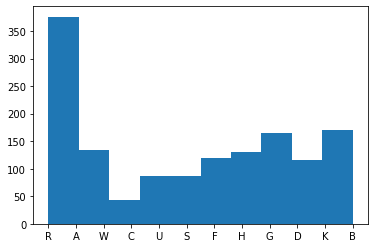

In [69]:
# 배송 조별 배송 건수 : 8월~ 10월 간 약 3개월동안 VOC 발생 분포이다. 결과적으로 R조가 배송 건수가 많이 발생했고, C조가 배송 건수가 제일 적게 발생했다. 
plt.hist(data=raw_data, x="조")

(array([166.,  46.,  33.,   0.,   8.,  15.,   0.,   2.,   1.,  14.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

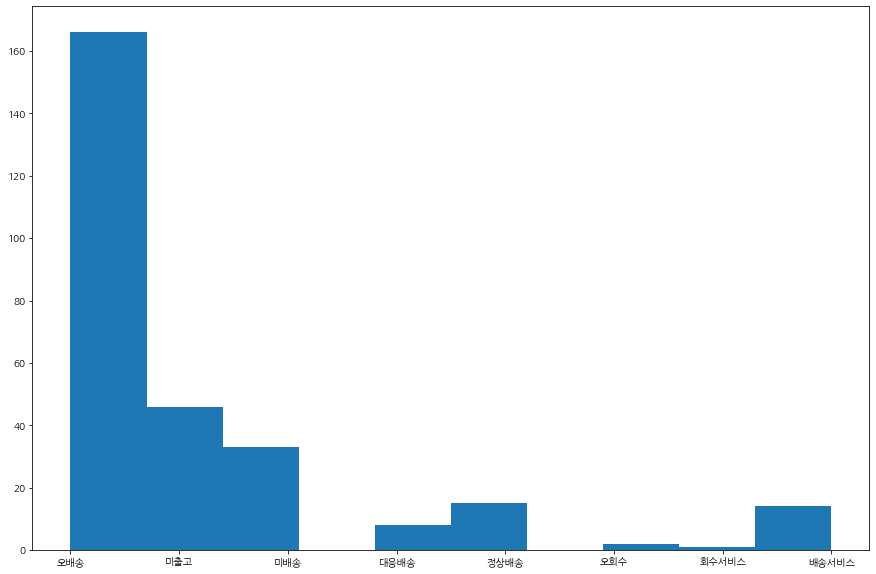

In [89]:
# R조의 배송 분포 : R조의 VOC 배송 대분류를 분포로 나타낸 결과, 오배송 건수가 많았다. 
plt.hist(data=raw_data[raw_data['조'] == 'R'], x='VOC 대분류')

(array([195.,  61.,  59.,  86.,  56.,  87., 116.,  75.,  61., 147.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

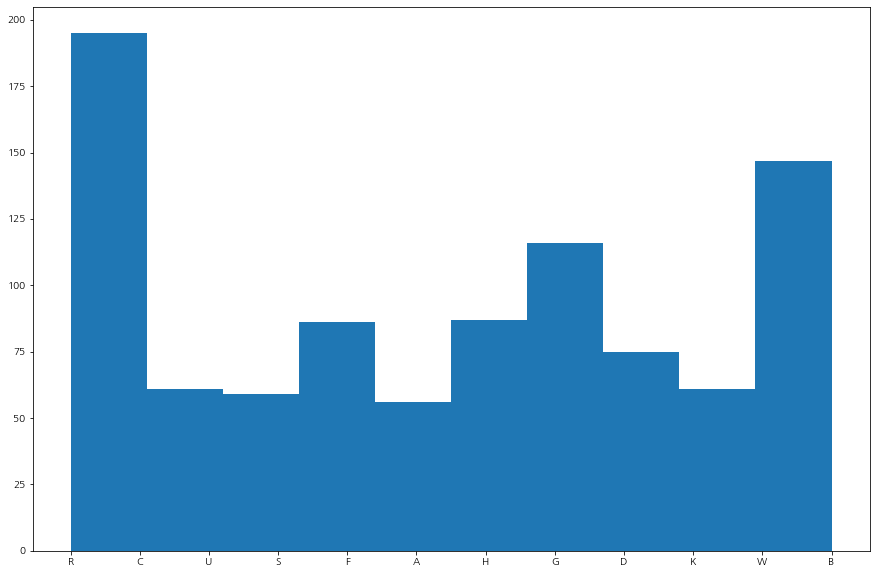

In [90]:
# 오배송 건수별 조 건수 : 오배송 건수의 배송 분포 결과, R조, B조 순으로 VOC 오배송 건수가 많았다. 
plt.hist(data=raw_data[raw_data['VOC 대분류'] == '오배송'], x='조')

3.	다음 데이터셋을 이용해 차량 운임료를 예측하는 모델 만들기
label : 실제 운임

In [ ]:
#랜덤포레스트 함수 사용
#svm
#https://throwexception.tistory.com/1079

In [96]:
# 데이터 불러오기
dataset = pd.read_csv('C:\\Users\\hansung\\Desktop\\data\\dataset.csv', encoding='cp949')

In [110]:
dataset.head(2)

,번호,차량종류,톤수,물량,화물온도,특이사항,거리,상차시간,날짜,표준운임,실제운임
0,1000,냉동탑,2.5,6.25,냉동,까대기,80.917,2,2020-02-10,14,15.0
1,1001,냉동탑,1.0,2.00,냉동,까대기,75.379,2,2020-02-26,11,14.0


In [123]:
# 독립변수 중 문자 -> 숫자 변환 (인코딩)
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
for type_label in ['차량종류', '화물온도','특이사항']:
    dataset[type_label] = encoder.fit_transform(dataset[type_label])

'''
[차량종류]
0 -> 냉동탑
1 -> 다마스
2 -> 모름
3 -> 윙바디
4 -> 카고
[화물온도]
0 -> 냉동
1 -> 냉장
2 -> 상온
[특이사항]
0 -> 기타
1 -> 까대기
2 -> 지게차
'''

'\n[차량종류]\n0 -> 냉동탑\n1 -> 다마스\n2 -> 모름\n3 -> 윙바디\n4 -> 카고\n[화물온도]\n0 -> 냉동\n1 -> 냉장\n2 -> 상온\n[특이사항]\n0 -> 기타\n1 -> 까대기\n2 -> 지게차\n'

In [124]:
dataset.head(2)

,번호,차량종류,톤수,물량,화물온도,특이사항,거리,상차시간,날짜,표준운임,실제운임
0,1000,0,2.5,6.25,0,1,80.917,2,2020-02-10,14,15.0
1,1001,0,1.0,2.00,0,1,75.379,2,2020-02-26,11,14.0


In [144]:
dataset.isnull().sum()

번호      0
차량종류    0
톤수      0
물량      0
화물온도    0
특이사항    0
거리      0
상차시간    0
날짜      0
표준운임    0
실제운임    0
dtype: int64

In [127]:
# 상관분석 진행하여 '실제운임' 변수와 상관성이 떨어지는 변수가 있다면, 모델 구현시 해당 변수 제외. 
# 상관분석 결과 : 실제 운임과 상관성이 높은 변수는 톤수, 표준운임이고, 상관성이 낮은 변수는 화물온도, 상차시간이다
dataset.corr()

,번호,차량종류,톤수,물량,화물온도,특이사항,거리,상차시간,표준운임,실제운임
번호,1.000000,0.071671,0.131381,-0.005468,0.086977,0.035939,0.012878,-0.054379,0.172663,0.201046
차량종류,0.071671,1.000000,0.247174,0.062582,0.820225,0.103369,0.041772,-0.122413,0.248063,0.121135
톤수,0.131381,0.247174,1.000000,0.160611,0.154381,0.340770,-0.005219,-0.090481,0.814526,0.733394
물량,-0.005468,0.062582,0.160611,1.000000,0.046975,0.061645,0.078515,-0.065131,0.172332,0.151862
화물온도,0.086977,0.820225,0.154381,0.046975,1.000000,0.101563,-0.029074,-0.105559,0.132858,-0.014046
특이사항,0.035939,0.103369,0.340770,0.061645,0.101563,1.000000,0.085267,0.020068,0.348302,0.269067
거리,0.012878,0.041772,-0.005219,0.078515,-0.029074,0.085267,1.000000,-0.002878,0.497309,0.471823
상차시간,-0.054379,-0.122413,-0.090481,-0.065131,-0.105559,0.020068,-0.002878,1.000000,-0.054796,-0.033939
표준운임,0.172663,0.248063,0.814526,0.172332,0.132858,0.348302,0.497309,-0.054796,1.000000,0.895750
실제운임,0.201046,0.121135,0.733394,0.151862,-0.014046,0.269067,0.471823,-0.033939,0.895750,1.000000


In [149]:
# 독립변수와 종속변수 나누기
dataset_x = dataset.drop(['번호','실제운임','날짜'], axis=1)
dataset_y = dataset['실제운임']

In [150]:
dataset_x.head()

,차량종류,톤수,물량,화물온도,특이사항,거리,상차시간,표준운임
0,0,2.5,6.250,0,1,80.917,2,14
1,0,1.0,2.000,0,1,75.379,2,11
2,0,5.0,10.000,0,2,44.725,2,17
3,0,2.5,3.250,0,1,22.863,0,12
4,0,1.0,0.625,0,1,120.822,2,13


In [151]:
dataset_y.head()

0    15.0
1    14.0
2    14.0
3    14.0
4    16.0
Name: 실제운임, dtype: float64

In [154]:
# train, test 데이터 분리하기 => train : test = 8 : 2 = 439 : 410
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.2, shuffle=True, random_state=34)

In [158]:
print(len(x_train), len(x_test))

439 110


In [162]:
# 앙상블의 부스팅 기법 중 하나인 XGBoost 기법 사용
# 학습 방법 : 실제값과 예측값의 loss 값을 단계별로 보완하며 결과 도출
import xgboost
from sklearn.metrics import explained_variance_score
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
'''
[파라메터 설정]
n_estimators : 생성할 트리 개수
learning_rate : 학습률
gamma : 기본값 0
subsample : 오버피팅을 방지하기 위해, 
colsample_bytree : 기본값 1
max_depth : 최대 트리의 깊이
'''
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

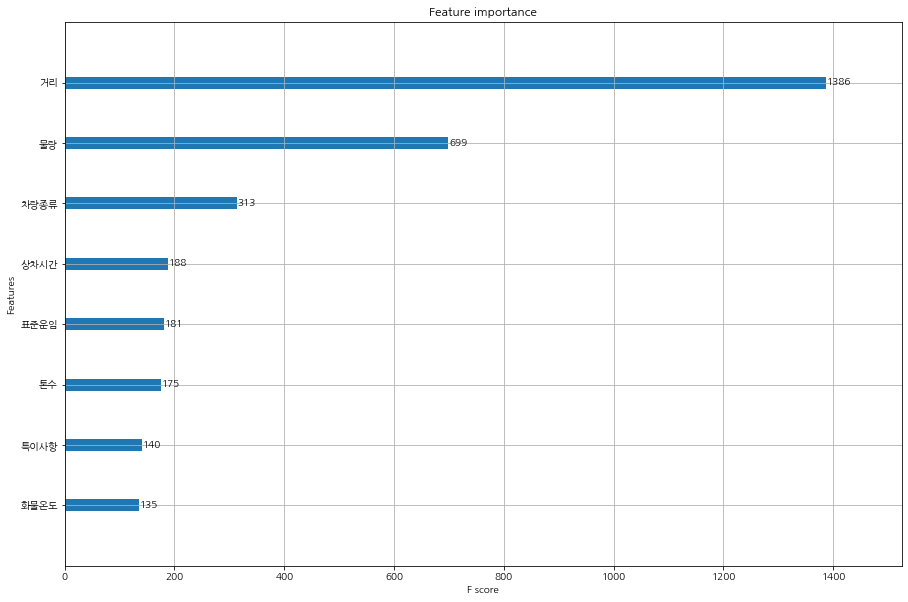

In [163]:
xgboost.plot_importance(xgb_model)
# 변수 중요도 : 거리 > 물량 > 차량종류 > 상차시간 > 표준운임 > 톤수 > 특이사항 > 화물온도

In [164]:
predictions = xgb_model.predict(x_test)
r_sq = xgb_model.score(x_train, y_train)
print(r_sq)
print(explained_variance_score(predictions,y_test))

0.9791812824387968
0.7423654860541202


In [166]:
predictions

array([15.455178 , 17.838964 ,  8.154579 , 11.111532 , 12.329691 ,
       13.7910185, 12.046341 ,  9.350286 ,  8.454818 , 11.577902 ,
       14.63478  , 16.854536 , 13.073276 , 12.50571  , 11.377697 ,
       11.486536 ,  9.4771385, 12.511008 , 12.385975 , 16.032324 ,
       12.263139 ,  9.60091  , 16.883263 , 15.521445 , 17.893587 ,
       10.662598 ,  9.896304 , 15.354041 , 11.849364 , 12.073597 ,
       12.7343855, 11.610423 , 12.511008 , 12.266581 , 12.619171 ,
       12.654421 ,  8.491359 , 16.43623  , 10.946801 , 13.39533  ,
        9.229167 , 11.498472 , 11.800403 , 10.148042 , 12.740693 ,
       18.179564 , 14.180879 ,  9.036984 , 11.800403 ,  8.778332 ,
       10.757924 ,  9.896304 , 12.568003 , 10.983248 ,  9.463976 ,
       11.957533 ,  8.92855  ,  9.036984 , 12.248809 ,  9.452019 ,
       10.220115 , 10.711053 , 16.705194 , 12.454318 , 10.840617 ,
       10.118624 , 14.167201 , 19.51155  , 11.9998455, 11.173365 ,
       12.046341 , 11.9998455,  9.4771385,  9.736605 , 18.0865

In [ ]:
# https://www.kaggle.com/search => cross vaildation 기법 코드

In [155]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})

result.head()

ValueError: Unknown label type: 'continuous'